In [1]:
from google.colab import files
  

uploaded = files.upload()

Saving mydata.csv to mydata.csv


In [6]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
import seaborn as sns
#%%
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')

#%%

# printing the stopwords in English
print(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [7]:
data=pd.read_csv('mydata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       31428 non-null  int64 
 1   title    31428 non-null  object
 2   text     31428 non-null  object
 3   subject  31428 non-null  object
 4   date     31428 non-null  object
 5   label    31428 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


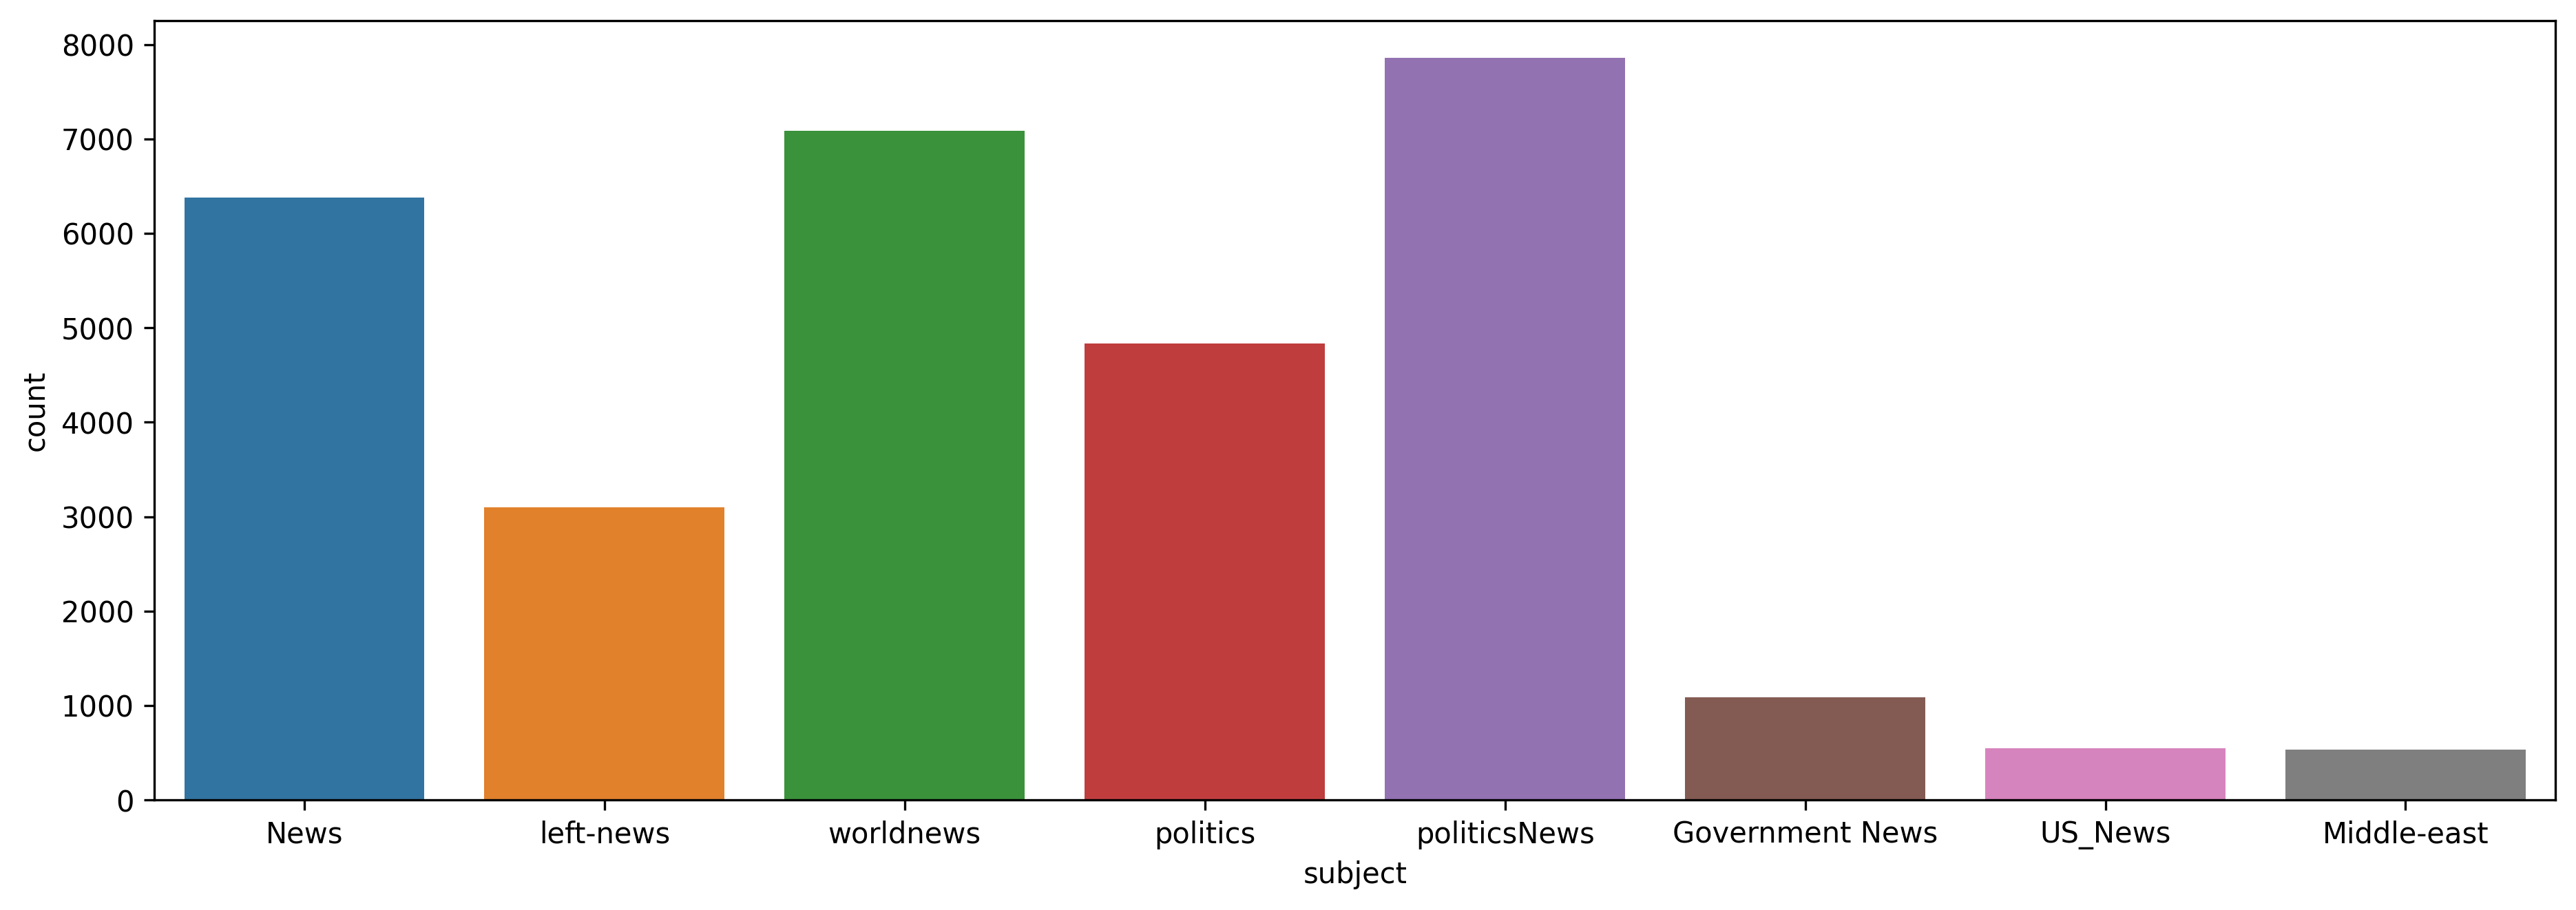

In [14]:
plt.figure(figsize=(15,5),dpi=300)
sns.countplot('subject',data=data)
#plt.legend(labels=[data['subject']],title = "subject")


In [15]:
data1=data.drop('Id', axis=1)
data1=data.drop('date', axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       31428 non-null  int64 
 1   title    31428 non-null  object
 2   text     31428 non-null  object
 3   subject  31428 non-null  object
 4   label    31428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [16]:
# separating the data & label
X = data1.drop(columns='label', axis=1)
Y = data1['label']
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       31428 non-null  int64 
 1   title    31428 non-null  object
 2   text     31428 non-null  object
 3   subject  31428 non-null  object
dtypes: int64(1), object(3)
memory usage: 982.2+ KB


In [17]:

port_stem = PorterStemmer()

def stemming(text):
    stemmed_content = re.sub('[^a-zA-Z]',' ',text)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
data1['text'] = data1['text'].apply(stemming)



In [18]:
data1.info()
data1.head()
#separating the data and label
X = data1['text'].values
Y = data1['label'].values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       31428 non-null  int64 
 1   title    31428 non-null  object
 2   text     31428 non-null  object
 3   subject  31428 non-null  object
 4   label    31428 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


In [19]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [22]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
pred=model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3044
           1       0.99      0.98      0.98      3242

    accuracy                           0.98      6286
   macro avg       0.98      0.98      0.98      6286
weighted avg       0.98      0.98      0.98      6286

